In [1]:
import torch 
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader 
import os   
import numpy as np 



In [2]:
class filterData(Dataset):
    def __init__(self,  path):
        self.path =  path
        self.lq_list = []
        self.gt_list = []
        self.__makelist(path)

    def __makelist(self ,  path):

        for filter in sorted(os.listdir(path)):

            filter_path =  os.path.join(path ,  filter)

            if not  os.path.isdir(filter_path):
                continue 

            gt_dir =  os.path.join(filter_path , "gt")
            lq_dir = os.path.join(filter_path ,  "lq")

            if not ( (os.path.isdir(gt_dir)) or (os.path.join(lq_dir))):
                continue 

            gt_files =  sorted(os.listdir(gt_dir))
            lq_files =  sorted(os.listdir(lq_dir))

            if len(gt_files) !=  len(lq_files):
                raise ValueError("gt and  lq  does not have same length ")
            
            for gt_file ,  lq_file in  zip(gt_files , lq_files):
                self.lq_list.append(os.path.join(lq_dir ,  lq_file))
                self.gt_list.append(os.path.join(gt_dir ,  gt_file))
    
    def __len__(self):
        return  len(self.lq_list)
    

    def __getitem__(self,  index ):

        lq =  torch.load(self.lq_list[index] , map_location="cpu")
        gt =  torch.load(self.gt_list[index] ,  map_location="cpu")
        

        return lq.unsqueeze(0) ,  gt.unsqueeze(0) 

            

class DataSET(Dataset):
    def __init__(self,lq_path ,  gt_path):
        self.lq_path =  lq_path 
        self.gt_path =  gt_path 

        self.lq_list ,self.gt_list = self.__makeList(lq_path ,  gt_path )

    def  __makeList(self,lq_path ,  gt_path):

        lq_list = []
        gt_list = []

        for filename_lq ,  filename_gt in zip(os.listdir(lq_path) , os.listdir(gt_path)):
            lq_file_path =  os.path.join(lq_path ,  filename_lq)
            lq_list.append(lq_file_path )

            gt_file_path = os.path.join(gt_path ,  filename_gt)
            gt_list.append(gt_file_path)

        return  lq_list ,  gt_list 

    def __len__(self):
        return  len(self.lq_list)
    

    
    def __getitem__(self, index):
        lq =  torch.load(self.lq_list[index] , map_location= "cpu")
        gt =  torch.load(self.gt_list[index] , map_location= "cpu")


        return  lq.unsqueeze(0) ,  gt.unsqueeze(0)
    

lq_easy = r"D:\denoise transformer\pretrain_dataset\lq_easy"
gt_easy  = r"D:\denoise transformer\pretrain_dataset\gt_easy"

pretraining_easy  =  DataSET(lq_easy ,gt_easy  )

lq_hard = r"D:\denoise transformer\pretrain_dataset\lq_hard"
gt_hard = r"D:\denoise transformer\pretrain_dataset\gt_hard"

pretraining_hard =  DataSET(lq_hard ,  gt_hard )


filter_data =  r"D:\denoise transformer\data"
filter_dataset =  filterData(filter_data)


print(filter_dataset.__getitem__(3))



# split  
from sklearn.model_selection  import  train_test_split 





# pretraining_loader_easy =  DataLoader(
#     pretraining_easy  ,  batch_size = 64 ,  shuffle =  True 
# )

# pretraining_loader_hard =  DataLoader(
#     pretraining_hard , batch_size =  64 ,  shuffle =  True 
# )

# filter_data_loader =  DataLoader(
#     filter_dataset ,  batch_size= 64,  shuffle=  True
# )

# iterator3 =  iter(filter_data_loader)
# x ,  y  =  next(iterator3)
# print(x.shape)
# print(y.shape)
# print(type(x))
# print(type(y))


(tensor([[[0.2985, 0.3986, 0.4308,  ..., 0.4357, 0.3776, 0.2713],
         [0.3918, 0.5248, 0.5754,  ..., 0.5705, 0.5055, 0.3716],
         [0.4304, 0.5740, 0.6319,  ..., 0.6066, 0.5452, 0.4099],
         ...,
         [0.3849, 0.5399, 0.6048,  ..., 0.6176, 0.5555, 0.4131],
         [0.3694, 0.5116, 0.5668,  ..., 0.5469, 0.4963, 0.3761],
         [0.2937, 0.4015, 0.4366,  ..., 0.3985, 0.3665, 0.2810]]]), tensor([[[0.6410, 0.6410, 0.6410,  ..., 0.6410, 0.6410, 0.6410],
         [0.6410, 0.6410, 0.6410,  ..., 0.6410, 0.6410, 0.6410],
         [0.6410, 0.6410, 0.6410,  ..., 0.6410, 0.6410, 0.6410],
         ...,
         [0.6410, 0.6410, 0.6410,  ..., 0.6412, 0.6412, 0.6411],
         [0.6410, 0.6410, 0.6410,  ..., 0.6411, 0.6411, 0.6411],
         [0.6410, 0.6410, 0.6410,  ..., 0.6411, 0.6411, 0.6410]]]))


In [3]:
from  torch.utils.data import  Subset
val_size = 1000 
dataset_easy  =  pretraining_easy 

indices =  np.arange(len(dataset_easy))

np.random.shuffle(indices)

val_indices =  indices[:val_size]
train_indices =  indices[val_size : ]

train_dataset =  Subset(dataset_easy , train_indices)
val_dataset =  Subset(dataset_easy , val_indices)

easy_train_loader =  DataLoader(
    train_dataset , 
    batch_size= 64 ,
    shuffle =  True,
    pin_memory= True,
)

easy_val_loader =  DataLoader(
    val_dataset,
    batch_size=  64 , 
    shuffle= False,
    pin_memory= True,
)

In [4]:
from  torch.utils.data import Subset
val_size = 100
dataset_filter =  filter_dataset
indices  = np.arange(len(dataset_filter))

np.random.shuffle(indices)
val_indices =  indices[:val_size]
train_indices = indices[val_size :]

val_dataset_filter =  Subset(dataset_filter , val_indices)
train_dataset_filter = Subset(dataset_filter , train_indices)

filter_train_loader = DataLoader(
    train_dataset_filter  , shuffle=  True , batch_size= 64 ,pin_memory= True
)
filter_val_loader =  DataLoader(
    val_dataset_filter , shuffle= True  ,  batch_size=  64,pin_memory= True 
)


In [5]:
from  torch.utils.data import  Subset  
val_size = 1000
dataset_hard=  pretraining_hard 
indices =  np.arange(len(dataset_hard))

np.random.shuffle(indices)

val_indices =  indices[:val_size]
train_indices  =   indices[val_size :]

val_dataset_hard =  Subset(dataset_hard , val_indices)
train_dataset_hard =  Subset(dataset_hard  , train_indices)

hard_train_loader = DataLoader(
    train_dataset_hard ,
    batch_size= 64 ,
    shuffle =  True,
    pin_memory= True
)
hard_val_loader = DataLoader(
    val_dataset_hard,
    shuffle =  False,
    batch_size =  64,
    pin_memory= True
    
)


In [6]:
def percentile_stretch(img ,  p_low = 1 , p_high = 99):
    img_arr =  img.detach().cpu().numpy()

    lo =  np.percentile(img_arr , p_low)
    hi =  np.percentile(img_arr ,p_high )

    img_stretch = (img_arr - lo) / (hi - lo + 1e-8)

    img_stretch =  np.clip(img_stretch ,  0.0 ,1.0)

    return img_stretch 




In [7]:
# import matplotlib.pyplot  as plt 

# plt.figure(figsize=(5,5))
# plt.subplot(1,2,1)
# plt.title("filter image  lq")
# plt.imshow(percentile_stretch(img1) , cmap = "gray")
# plt.axis("off")
# plt.subplot(1,2,2)
# plt.title("filter image  gt")
# plt.imshow(percentile_stretch(img2) ,  cmap =  "gray")
# plt.axis("off")
# plt.show()





In [8]:

import torch.nn as nn 
class encoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.GroupNorm(8,out_channels),
            nn.ReLU(inplace=True),   

            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.GroupNorm(8 , out_channels),
            nn.ReLU(inplace=True),
        )

        self.maxpool = nn.AvgPool2d(2)

    def forward(self, x):
        f = self.conv(x)
        p = self.maxpool(f)
        return f, p


class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.up = nn.Upsample(scale_factor=2, mode="nearest")

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.GroupNorm(8,out_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.GroupNorm(8,out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x, skip):
        x = self.up(x)
        x = torch.cat([x, skip], dim=1)
        return self.conv(x)


class UNet(nn.Module):
    def __init__(self):
        super().__init__()


        self.e1 = encoderBlock(1, 32)
        self.e2 = encoderBlock(32, 64)
        self.e3 =  encoderBlock(64 , 128)

        self.bottleneck = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=2 , dilation=  2),
            nn.GroupNorm(8,256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=2 , dilation=  2),
            nn.GroupNorm(8,256),
            nn.ReLU(inplace=True),
        )

        self.d3 =  DecoderBlock(128+256 , 192)
        self.d2 = DecoderBlock(192 + 64, 128)
        self.d1 = DecoderBlock(128 + 32, 80)

        self.out = nn.Conv2d(80, 1, 1)
        nn.init.zeros_(self.out.weight)
        nn.init.zeros_(self.out.bias)

    def forward(self, x):
        s1, p1 = self.e1(x)
        s2, p2 = self.e2(p1)
        s3 ,  p3 =  self.e3(p2)

        b = self.bottleneck(p3)
        
        d3 =  self.d3(b , s3)
        d2 = self.d2(d3, s2)
        d1 = self.d1(d2, s1)

        return x - self.out(d1)


# Test
x = torch.randn(2, 1, 64, 64)
model = UNet()
y = model(x)
print(y.shape)


torch.Size([2, 1, 64, 64])


In [9]:
device  =  torch.device("cuda" if torch.cuda.is_available()  else  "cpu")
model =  model.to(device)
from  pytorch_msssim import ssim as  ss



def compute_psnr(pred ,  gt , max_val = 1.0):
    mse =  torch.mean((pred - gt) ** 2 )

    if mse == 0:
        return  torch.tensor(100.0 , device = pred.device)
    return 20  *  torch.log10(max_val  /  torch.sqrt(mse))



def validate_psnr(model ,  val_loader ,  device):
    model.eval()

    total_psnr = 0.0
    count = 0
    total_ssim = 0.0

    with torch.no_grad():
        for lq , gt in val_loader:
            
            lq =  lq.to(device)
            gt =  gt.to(device)

            pred = model(lq) 


            pred =  torch.clamp(pred ,  0.0 ,1.0)
            gt   = torch.clamp(gt ,  0.0  , 1.0)

            B =  pred.size(0)

            for i  in range(B):
                p =  pred[i]
                g =  gt[i]
                g = g  - g.min()
                g = g / (g.max() + 1e-8)


                psnr =  compute_psnr(p ,g)
                ssim_val = ss(
                    p.unsqueeze(0),
                    g.unsqueeze(0),
                    data_range = 1.0

                )
                total_psnr +=  psnr.item()
                total_ssim +=  ssim_val.item()
                count+=1

            print("GT min/max:", gt.min().item(), gt.max().item())
            print("Pred min/max:", pred.min().item(), pred.max().item())

            return  total_psnr / count   ,  total_ssim / count


In [10]:
from  pytorch_msssim import ssim  as  ssim_f
import   torch.nn.functional as F

In [11]:
import torch

def image_gradients(img):
    """
    img: (B, C, H, W)
    returns: grad_x, grad_y
    """

    grad_x = img[:, :, :, 1:] - img[:, :, :, :-1]   # horizontal
    grad_y = img[:, :, 1:, :] - img[:, :, :-1, :]   # vertical

    return grad_x, grad_y

def gradient_loss(pred, gt):
    gx_p, gy_p = image_gradients(pred)
    gx_g, gy_g = image_gradients(gt)

    loss_x = torch.mean(torch.abs(gx_p - gx_g))
    loss_y = torch.mean(torch.abs(gy_p - gy_g))

    return loss_x + loss_y
def denoiser_loss(pred, gt, ssim_fn,
                  lambda_ssim=0.05,
                  lambda_grad=0.01):

    # 1. Pixel accuracy (structure anchor)
    l1 = torch.mean(torch.abs(pred - gt))

    # 2. Perceptual structure
    ssim_loss = 1.0 - ssim_fn(pred, gt)

    # 3. Background smoothness
    grad = gradient_loss(pred, gt)

    # Final loss
    total = l1 + lambda_ssim * ssim_loss + lambda_grad * grad
    return total



In [12]:
import matplotlib.pyplot  as  plt  
def show_denoising(model , lq ,  gt  ,title= ""):
    model.eval()
    with  torch.no_grad():
        pred =  model(lq)
        pred =  torch.clamp(pred ,  0.0 ,1.0)

    lq =  lq.squeeze().cpu()
    gt =  gt.squeeze().cpu()
    pred =  pred.squeeze().cpu()
    error  =  torch.abs(pred -  gt )


    plt.figure(figsize=(12,4))

    plt.subplot(1,4,1)
    plt.title("lq")
    plt.imshow(lq , cmap= "gray")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.title("pred")
    plt.imshow(pred , cmap = "gray")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.title("gt")
    plt.imshow(gt , cmap =  "gray")

    plt.subplot(1,4,4)
    plt.title("ABS error")
    plt.imshow(error ,  cmap  =  "hot")
    plt.colorbar(fraction  = 0.046)
    plt.axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [13]:

best_psnr = -1.0
device =  torch.device("cuda" if  torch.cuda.is_available()  else "cpu")
patience = 10

from torch.optim import  Adam 
import  time 


optimizer = Adam(model.parameters(), lr=1e-3)


from torch.optim.lr_scheduler import  ReduceLROnPlateau 

scheduler1 =  ReduceLROnPlateau(
    optimizer,
    mode = "max",
    factor= 0.5,
    patience= 3 ,
    min_lr = 1e-6,

)

model =   model.to(device)




pre training(EASY)  is starting  
step 0/454 | Loss : 0.0053
step 50/454 | Loss : 0.0022
step 100/454 | Loss : 0.0026
step 150/454 | Loss : 0.0022
step 200/454 | Loss : 0.0014
step 250/454 | Loss : 0.0018
step 300/454 | Loss : 0.0014
step 350/454 | Loss : 0.0014
step 400/454 | Loss : 0.0012
step 450/454 | Loss : 0.0010
epoch : 0/30 | loss : 0.0019021688311490013 | time : 1594.8 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 0.8246840238571167
saved new best model | PSNR = 38.50


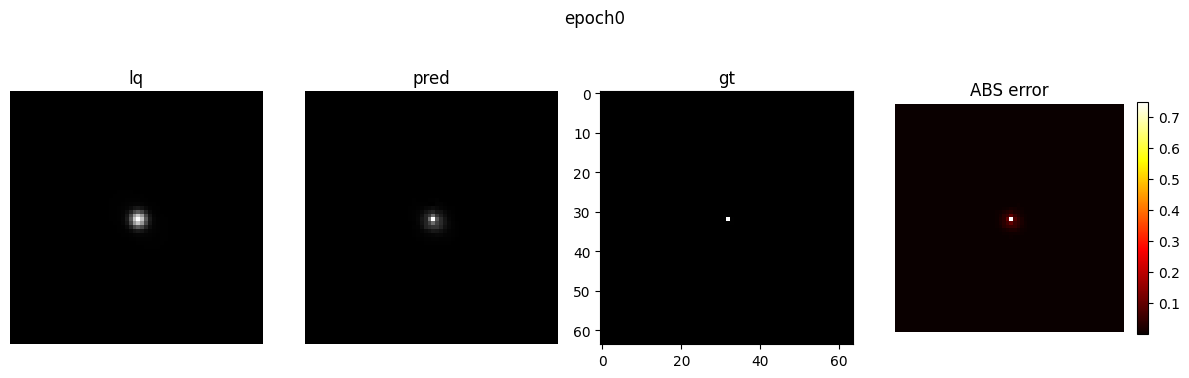

validation  PSNR : 38.50 dB
validation  SSIM : 0.983391085639596 
epoch : 0 | loss : 0.0019021688311490013 | time : 1594.8 sec
------------------------------
******************************
step 0/454 | Loss : 0.0013
step 50/454 | Loss : 0.0012
step 100/454 | Loss : 0.0013
step 150/454 | Loss : 0.0012
step 200/454 | Loss : 0.0008
step 250/454 | Loss : 0.0008
step 300/454 | Loss : 0.0009
step 350/454 | Loss : 0.0007
step 400/454 | Loss : 0.0006
step 450/454 | Loss : 0.0010
epoch : 1/30 | loss : 0.000975925931532658 | time : 103.2 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved new best model | PSNR = 53.56
validation  PSNR : 53.56 dB
validation  SSIM : 0.9959202818572521 
epoch : 1 | loss : 0.000975925931532658 | time : 103.2 sec
------------------------------
******************************
step 0/454 | Loss : 0.0010
step 50/454 | Loss : 0.0008
step 100/454 | Loss : 0.0005
step 150/454 | Loss : 0.0007
step 200/454 | Loss : 0.0007
step 250/454 | Loss : 0.0007
step 300/454 | Loss : 0.0

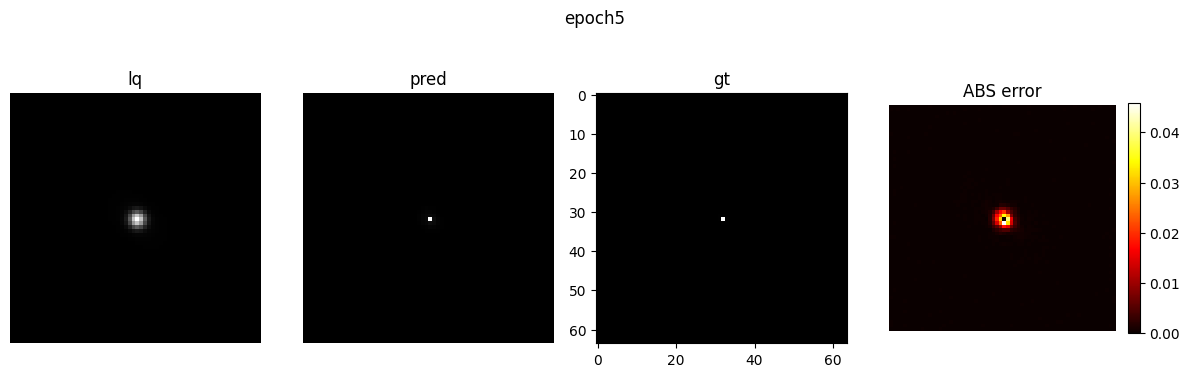

validation  PSNR : 55.69 dB
validation  SSIM : 0.9979049488902092 
epoch : 5 | loss : 0.00047827614430929967 | time : 103.2 sec
------------------------------
******************************
step 0/454 | Loss : 0.0004
step 50/454 | Loss : 0.0004
step 100/454 | Loss : 0.0004
step 150/454 | Loss : 0.0004
step 200/454 | Loss : 0.0005
step 250/454 | Loss : 0.0004
step 300/454 | Loss : 0.0003
step 350/454 | Loss : 0.0005
step 400/454 | Loss : 0.0005
step 450/454 | Loss : 0.0005
epoch : 6/30 | loss : 0.0004630801850319061 | time : 102.9 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved new best model | PSNR = 68.96
validation  PSNR : 68.96 dB
validation  SSIM : 0.9996639546006918 
epoch : 6 | loss : 0.0004630801850319061 | time : 102.9 sec
------------------------------
******************************
step 0/454 | Loss : 0.0003
step 50/454 | Loss : 0.0005
step 100/454 | Loss : 0.0003
step 150/454 | Loss : 0.0003
step 200/454 | Loss : 0.0004
step 250/454 | Loss : 0.0005
step 300/454 | Loss : 

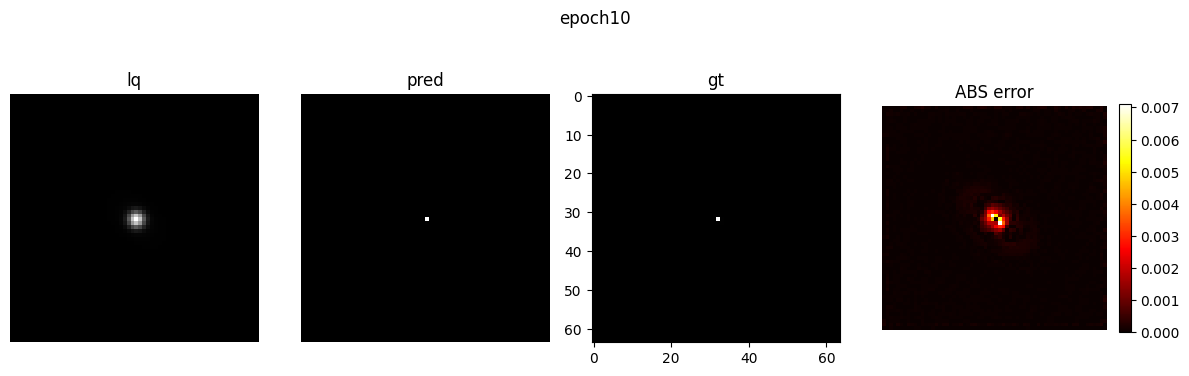

validation  PSNR : 69.90 dB
validation  SSIM : 0.9996719313785434 
epoch : 10 | loss : 0.00034501782615514194 | time : 110.2 sec
------------------------------
******************************
step 0/454 | Loss : 0.0003
step 50/454 | Loss : 0.0004
step 100/454 | Loss : 0.0003
step 150/454 | Loss : 0.0005
step 200/454 | Loss : 0.0003
step 250/454 | Loss : 0.0002
step 300/454 | Loss : 0.0004
step 350/454 | Loss : 0.0003
step 400/454 | Loss : 0.0004
step 450/454 | Loss : 0.0006
epoch : 11/30 | loss : 0.00032272318101540364 | time : 784.8 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT | patience: 1 / 10
validation  PSNR : 66.88 dB
validation  SSIM : 0.9996265452355146 
epoch : 11 | loss : 0.00032272318101540364 | time : 784.8 sec
------------------------------
******************************
step 0/454 | Loss : 0.0004
step 50/454 | Loss : 0.0003
step 100/454 | Loss : 0.0005
step 150/454 | Loss : 0.0003
step 200/454 | Loss : 0.0003
step 250/454 | Loss : 0.0003
step 300/454 | Loss

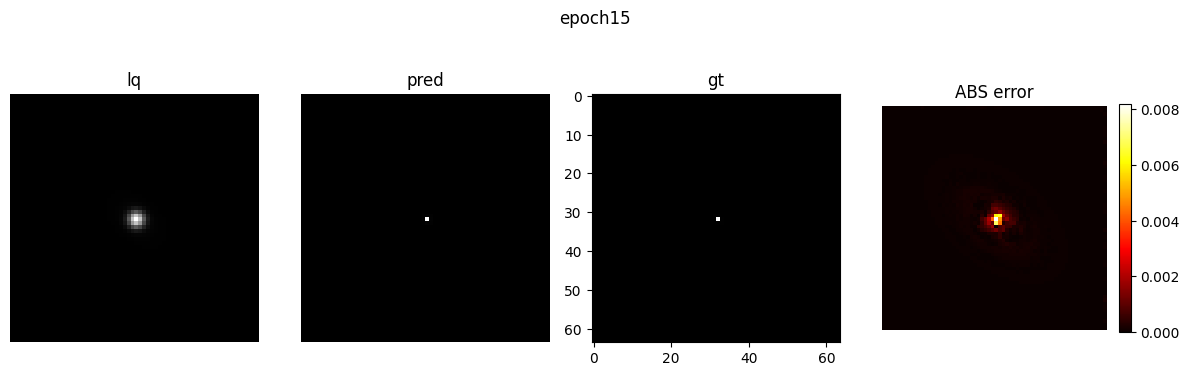

validation  PSNR : 67.24 dB
validation  SSIM : 0.9998048515990376 
epoch : 15 | loss : 0.0002940221234044729 | time : 216.4 sec
------------------------------
******************************
step 0/454 | Loss : 0.0002
step 50/454 | Loss : 0.0003
step 100/454 | Loss : 0.0002
step 150/454 | Loss : 0.0002
step 200/454 | Loss : 0.0002
step 250/454 | Loss : 0.0004
step 300/454 | Loss : 0.0005
step 350/454 | Loss : 0.0003
step 400/454 | Loss : 0.0003
step 450/454 | Loss : 0.0002
epoch : 16/30 | loss : 0.00028766791173026157 | time : 1020.5 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT | patience: 2 / 10
validation  PSNR : 67.16 dB
validation  SSIM : 0.9996264735236764 
epoch : 16 | loss : 0.00028766791173026157 | time : 1020.5 sec
------------------------------
******************************
step 0/454 | Loss : 0.0003
step 50/454 | Loss : 0.0004
step 100/454 | Loss : 0.0003
step 150/454 | Loss : 0.0003
step 200/454 | Loss : 0.0002
step 250/454 | Loss : 0.0003
step 300/454 | Los

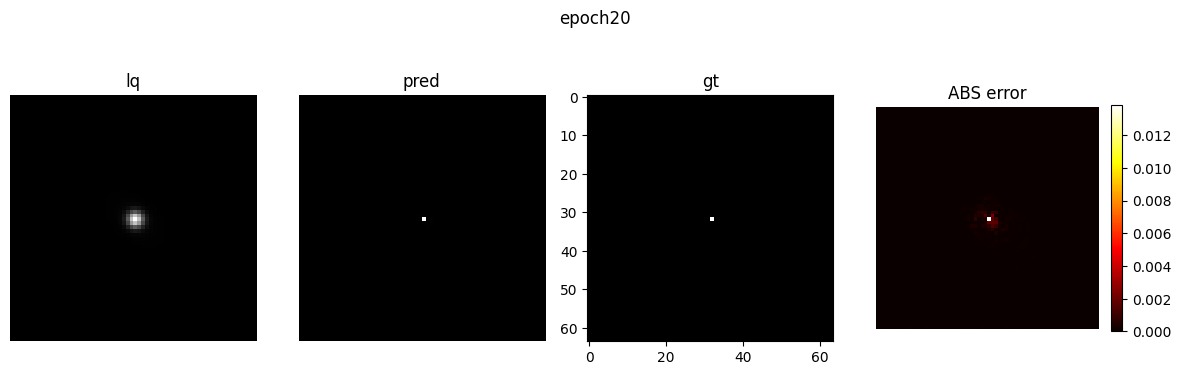

validation  PSNR : 68.43 dB
validation  SSIM : 0.9999479604884982 
epoch : 20 | loss : 0.00016913999208338388 | time : 105.1 sec
------------------------------
******************************
step 0/454 | Loss : 0.0002
step 50/454 | Loss : 0.0002
step 100/454 | Loss : 0.0001
step 150/454 | Loss : 0.0002
step 200/454 | Loss : 0.0002
step 250/454 | Loss : 0.0001
step 300/454 | Loss : 0.0002
step 350/454 | Loss : 0.0001
step 400/454 | Loss : 0.0002
step 450/454 | Loss : 0.0001
epoch : 21/30 | loss : 0.0001622621129280508 | time : 105.3 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT | patience: 7 / 10
validation  PSNR : 69.98 dB
validation  SSIM : 0.9998825937509537 
epoch : 21 | loss : 0.0001622621129280508 | time : 105.3 sec
------------------------------
******************************
step 0/454 | Loss : 0.0001
step 50/454 | Loss : 0.0002
step 100/454 | Loss : 0.0001
step 150/454 | Loss : 0.0001
step 200/454 | Loss : 0.0002
step 250/454 | Loss : 0.0002
step 300/454 | Loss :

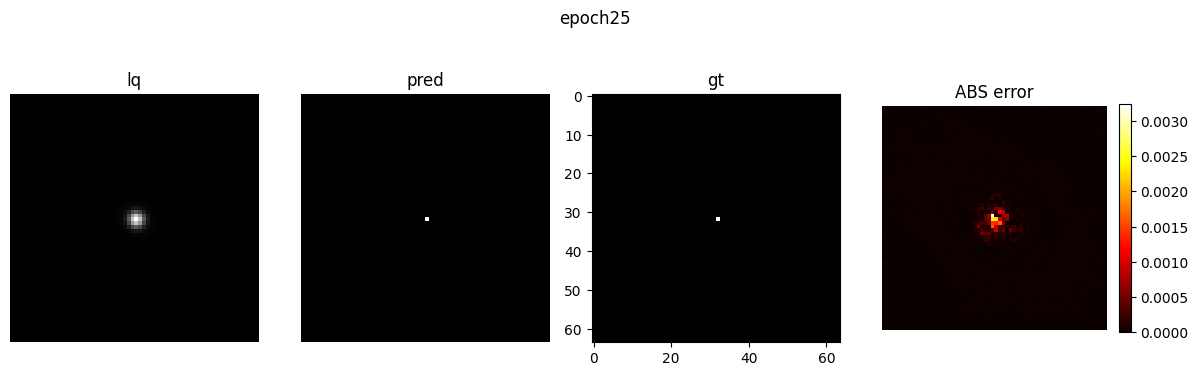

validation  PSNR : 75.75 dB
validation  SSIM : 0.9999428261071444 
epoch : 25 | loss : 0.00011524717145557627 | time : 107.2 sec
------------------------------
******************************
step 0/454 | Loss : 0.0001
step 50/454 | Loss : 0.0001
step 100/454 | Loss : 0.0001
step 150/454 | Loss : 0.0001
step 200/454 | Loss : 0.0002
step 250/454 | Loss : 0.0001
step 300/454 | Loss : 0.0001
step 350/454 | Loss : 0.0001
step 400/454 | Loss : 0.0001
step 450/454 | Loss : 0.0001
epoch : 26/30 | loss : 0.00011135619571870952 | time : 108.0 sec
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT | patience: 1 / 10
validation  PSNR : 74.01 dB
validation  SSIM : 0.9999450743198395 
epoch : 26 | loss : 0.00011135619571870952 | time : 108.0 sec
------------------------------
******************************
step 0/454 | Loss : 0.0001
step 50/454 | Loss : 0.0001
step 100/454 | Loss : 0.0001
step 150/454 | Loss : 0.0002
step 200/454 | Loss : 0.0001
step 250/454 | Loss : 0.0001
step 300/454 | Loss

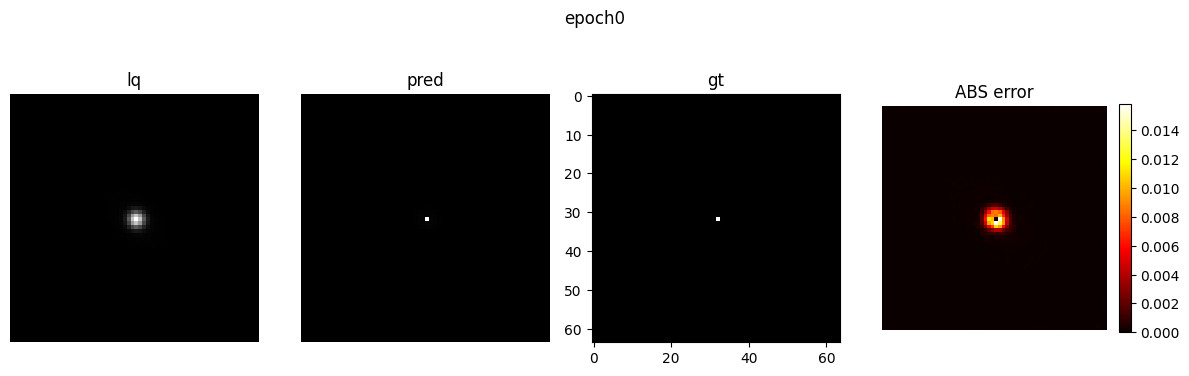

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved  new best model | PSNR : 61.63
validation PSNR : 61.63 dB
valiation  SSIM : 0.9993347004055977
epoch : 0 | loss : 0.0001732963158803918 | time : 1579.9 sec
------------------------------
******************************
step0/454 | Loss : 0.0003
step50/454 | Loss : 0.0003
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0002
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0002
step450/454 | Loss : 0.0002
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved  new best model | PSNR : 65.98
validation PSNR : 65.98 dB
valiation  SSIM : 0.9998230319470167
epoch : 1 | loss : 0.00017059576693288406 | time : 113.5 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0002
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0002
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.000

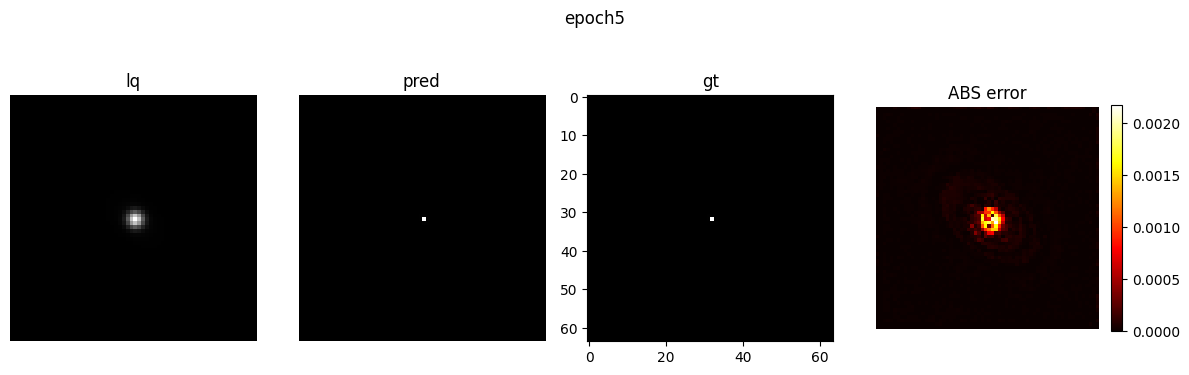

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved  new best model | PSNR : 73.62
validation PSNR : 73.62 dB
valiation  SSIM : 0.9999285954982042
epoch : 5 | loss : 0.00015488307690247893 | time : 107.7 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0002
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0003
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0002
step450/454 | Loss : 0.0002
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:1/15
validation PSNR : 70.94 dB
valiation  SSIM : 0.9999187802895904
epoch : 6 | loss : 0.0001553059262708819 | time : 111.3 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0002
step150/454 | Loss : 0.0002
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0002
step350

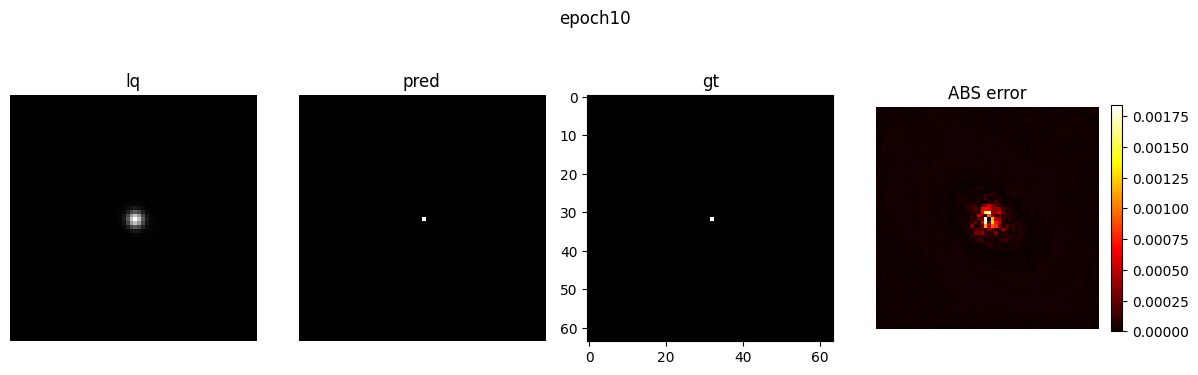

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved  new best model | PSNR : 77.24
validation PSNR : 77.24 dB
valiation  SSIM : 0.99994423892349
epoch : 10 | loss : 9.475323037247714e-05 | time : 107.9 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0002
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0001
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:1/15
validation PSNR : 72.81 dB
valiation  SSIM : 0.9998989710584283
epoch : 11 | loss : 9.46668497469309e-05 | time : 109.1 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/4

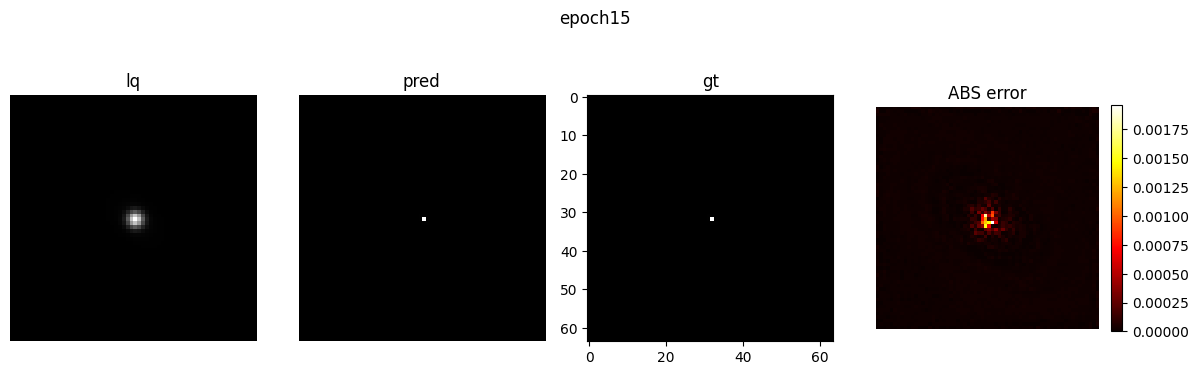

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
saved  new best model | PSNR : 78.78
validation PSNR : 78.78 dB
valiation  SSIM : 0.9999654833227396
epoch : 15 | loss : 6.978211817041215e-05 | time : 993.2 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0000
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:1/15
validation PSNR : 77.98 dB
valiation  SSIM : 0.9999571982771158
epoch : 16 | loss : 7.167773471421706e-05 | time : 188.6 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0000
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step35

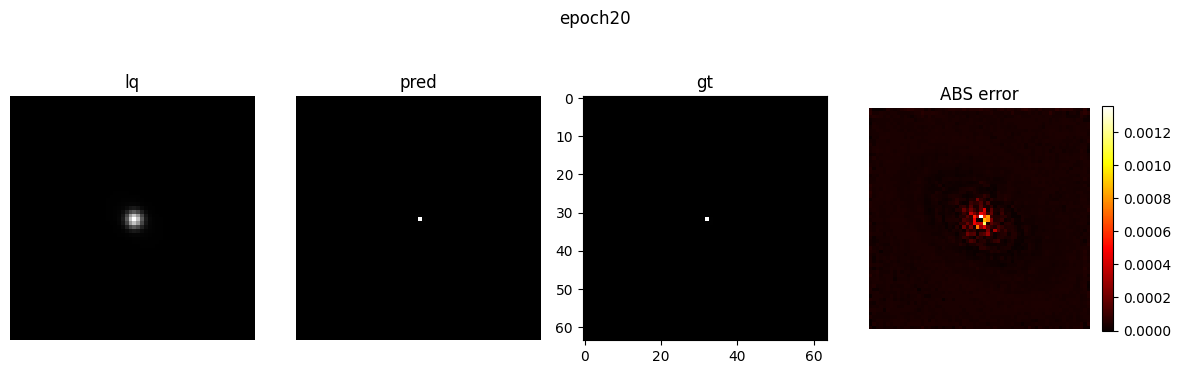

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:1/15
validation PSNR : 77.96 dB
valiation  SSIM : 0.9999677482992411
epoch : 20 | loss : 7.226579861511837e-05 | time : 109.1 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0000
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0001
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:2/15
validation PSNR : 75.49 dB
valiation  SSIM : 0.9999721217900515
epoch : 21 | loss : 7.201635864299685e-05 | time : 108.8 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | 

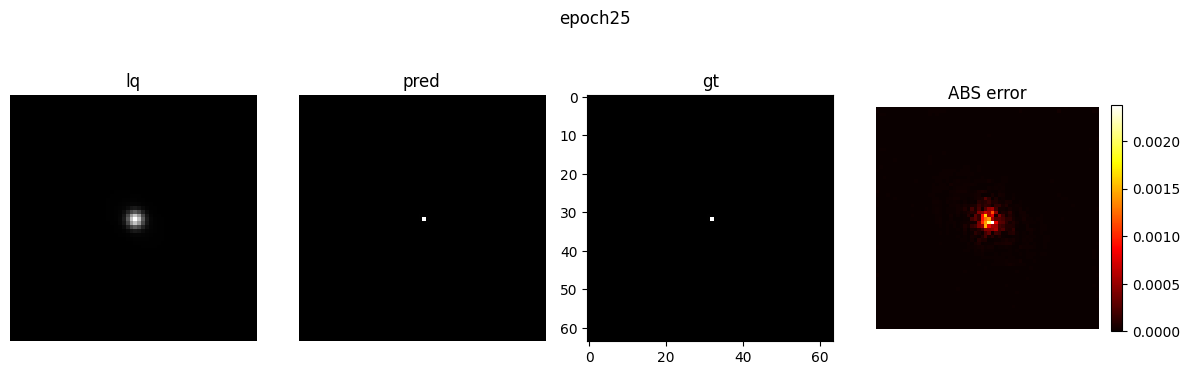

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:6/15
validation PSNR : 78.70 dB
valiation  SSIM : 0.9999730968847871
epoch : 25 | loss : 5.940372431026372e-05 | time : 107.6 sec
------------------------------
******************************
step0/454 | Loss : 0.0000
step50/454 | Loss : 0.0000
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0000
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0000
step400/454 | Loss : 0.0001
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:7/15
validation PSNR : 79.80 dB
valiation  SSIM : 0.9999784715473652
epoch : 26 | loss : 5.8968439092263446e-05 | time : 112.5 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0000
step300/454 | Loss : 0.0001
step350/454 |

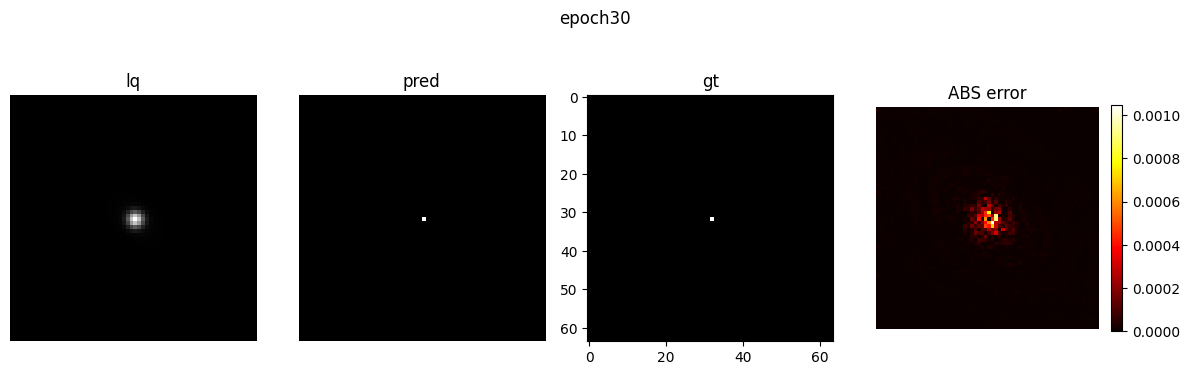

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:2/15
validation PSNR : 80.38 dB
valiation  SSIM : 0.999979461543262
epoch : 30 | loss : 5.423961679118076e-05 | time : 107.6 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0001
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0000
step200/454 | Loss : 0.0001
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0000
step350/454 | Loss : 0.0001
step400/454 | Loss : 0.0001
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:3/15
validation PSNR : 81.87 dB
valiation  SSIM : 0.999974868260324
epoch : 31 | loss : 5.406964431527852e-05 | time : 111.3 sec
------------------------------
******************************
step0/454 | Loss : 0.0001
step50/454 | Loss : 0.0000
step100/454 | Loss : 0.0000
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0000
step250/454 | Loss : 0.0000
step300/454 | Loss : 0.0001
step350/454 | Lo

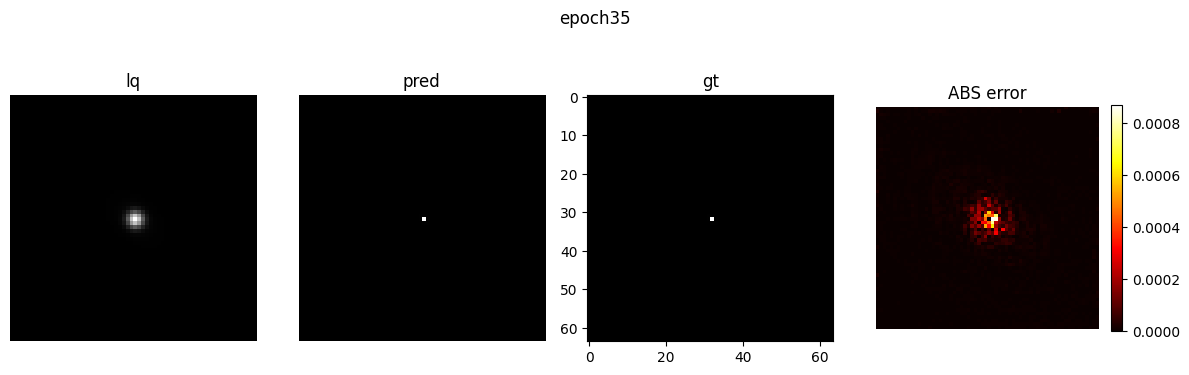

GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:7/15
validation PSNR : 81.51 dB
valiation  SSIM : 0.999979074113071
epoch : 35 | loss : 5.181786735048636e-05 | time : 107.2 sec
------------------------------
******************************
step0/454 | Loss : 0.0000
step50/454 | Loss : 0.0000
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0000
step200/454 | Loss : 0.0000
step250/454 | Loss : 0.0000
step300/454 | Loss : 0.0001
step350/454 | Loss : 0.0000
step400/454 | Loss : 0.0000
step450/454 | Loss : 0.0001
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
NO IMPROVEMENT patience:8/15
validation PSNR : 82.32 dB
valiation  SSIM : 0.9999805223196745
epoch : 36 | loss : 5.179048384328107e-05 | time : 108.6 sec
------------------------------
******************************
step0/454 | Loss : 0.0000
step50/454 | Loss : 0.0000
step100/454 | Loss : 0.0001
step150/454 | Loss : 0.0001
step200/454 | Loss : 0.0000
step250/454 | Loss : 0.0001
step300/454 | Loss : 0.0001
step350/454 | L

In [14]:

# pre training  easy --------------------------------------------------------------------------------------------------------------
  
epoch  = 30
patience_counter = 0
print("pre training(EASY)  is starting  ")
patience = 10


for  i in range(epoch):
    

    t0  =  time.time()
    epoch_loss = 0.0 
    model.train()
    
    
    for steps , (lq,gt)  in enumerate(easy_train_loader):
        
        lq = lq.to(device)
        gt =  gt.to(device)

        optimizer.zero_grad()
        outputs =  model(lq)

        loss =  denoiser_loss( outputs, gt, ssim_fn= ssim_f , lambda_ssim=0.05,lambda_grad=0.01)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        epoch_loss +=  loss.item()

        if steps % 50 == 0:
            print(
                f"step {steps}/{len(easy_train_loader)} | "
                f"Loss : {loss.item():.4f}"
            )

    epoch_loss /=  len(easy_train_loader)
    t1 =  time.time()
    print(f"epoch : {i}/{epoch} | loss : {epoch_loss} | time : {t1- t0:.1f} sec")
    # psnr 
    val_psnr  , val_ssim  = validate_psnr(model ,  easy_val_loader  , device)
    scheduler1.step(val_psnr)
    if val_psnr  > best_psnr :
        best_psnr =  val_psnr
        torch.save(model.state_dict() , "best_model.pt")
        print(f"saved new best model | PSNR = {best_psnr:.2f}")
        patience_counter = 0

    else:
        patience_counter += 1 
        print(f"NO IMPROVEMENT | patience: {patience_counter} / {patience}")
        

    if i % 5 == 0:
       
        sample_lq , sample_gt  =  val_dataset[0]
        sample_lq =  sample_lq.unsqueeze(0).to(device)
        sample_gt =  sample_gt.unsqueeze(0).to(device)
        show_denoising(model  ,  sample_lq  , sample_gt ,  title= f"epoch{i}")


        
    print(f"validation  PSNR : {val_psnr:.2f} dB")
    print(f"validation  SSIM : {val_ssim} ")
    print(f"epoch : {i} | loss : {epoch_loss} | time : {t1- t0:.1f} sec")
    print("-"*30)
    if(patience_counter ==  patience):
        print("early stopping...")
        break
    print("*"*30)
print("pre training(EASY)  is completed  ")


#pretraining  hard  ---------------------------------------------------------------------------------------------------------------------
print("pre training(HARD)  is starting  ")
for g in optimizer.param_groups:
    g["lr"] = 5e-4
best_psnr  =  -1.0
epoch  = 40
patience_counter = 0
patience = 15

scheduler2 = ReduceLROnPlateau(
    optimizer,
    mode="max",
    factor=0.5,
    patience=3,
    min_lr=1e-6,
   
)


for  i in range(epoch):
    t0  =  time.time()
    epoch_loss = 0.0 
    model.train()
    
    

    for steps , (lq,gt)  in enumerate(hard_train_loader):
        
       
        lq = lq.to(device)
        gt =  gt.to(device)

        optimizer.zero_grad()
        outputs =  model(lq)
        loss =  denoiser_loss( outputs, gt, ssim_fn= ssim_f , lambda_ssim=0.05,lambda_grad=0.01)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        epoch_loss +=  loss.item()
        

        if steps % 50 == 0:
            print(
                f"step{steps}/{len(hard_train_loader)} | "
                f"Loss : {loss.item():.4f}"
            )
    if i % 5 == 0:
       
        sample_lq , sample_gt  =  val_dataset[0]
        sample_lq =  sample_lq.unsqueeze(0).to(device)
        sample_gt =  sample_gt.unsqueeze(0).to(device)
        show_denoising(model  ,  sample_lq  , sample_gt ,  title= f"epoch{i}")

    epoch_loss /=  len(hard_train_loader)
    t1 =  time.time()

    val_psnr, val_ssim = validate_psnr(model , hard_val_loader , device)
    scheduler2.step(val_psnr)

    if val_psnr  >  best_psnr :
        best_psnr =  val_psnr 
        torch.save(
            model.state_dict(),
            "best_model.pt"
        )
        print(f"saved  new best model | PSNR : {best_psnr:.2f}")
        patience_counter = 0
    else:
        patience_counter +=  1 
        print(f"NO IMPROVEMENT patience:{patience_counter}/{patience}")
        

    print(f"validation PSNR : {val_psnr:.2f} dB")
    print(f"valiation  SSIM : {val_ssim}")

    print(f"epoch : {i} | loss : {epoch_loss} | time : {t1- t0:.1f} sec")
    print("-"*30)

    if(patience ==  patience_counter):
        print("early stopping...")
        break
    print("*"*30)
print("pretraining(HARD) is completed ")


In [15]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("best_model.pt" , map_location= device))
model =  model.to(device)
print("loaded best pretrained  model  ..  resuming  fine tuning ")

model.eval()
with torch.no_grad():
    best_psnr ,  ssim =  validate_psnr(model  ,filter_val_loader  , device )

print("val psnr : ",best_psnr)
print("val ssim : ",ssim)
#----------------------------------------------------------------------------------------------------------------------
print("finetuning  started ")
for g in optimizer.param_groups:
    g["lr"] = 1e-3

scheduler3 = ReduceLROnPlateau(
    optimizer,
    mode="max",
    factor=0.5,
    patience=3,
    min_lr=1e-4,
    
)

epoch  =  50
patience_counter = 0
patience = 40


for  i in range(epoch):
    t0  =  time.time()
    epoch_loss = 0.0 
    model.train()
    

    for steps , (lq,gt)  in enumerate(filter_train_loader):
        
        lq = lq.to(device)
        gt =  gt.to(device)

        optimizer.zero_grad()
        outputs =  model(lq)

        loss =  denoiser_loss( outputs, gt, ssim_fn= ssim_f , lambda_ssim=0.05,lambda_grad=0.01)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        epoch_loss +=  loss.item()
        

        if steps % 50 == 0:
            print(
                f"step{steps}/{len(filter_train_loader)} | "
                f"Loss : {loss.item():.4f}"
            )
    if i % 5 == 0:
        
        sample_lq , sample_gt  =  val_dataset[0]
        sample_lq =  sample_lq.unsqueeze(0).to(device)
        sample_gt =  sample_gt.unsqueeze(0).to(device)

        
    epoch_loss /=  len(filter_train_loader)
    t1 =  time.time()

    val_psnr  , val_ssim  =  validate_psnr(model , filter_val_loader  ,  device)
    scheduler3.step(val_psnr)

    if val_psnr  >  best_psnr :
        best_psnr =  val_psnr 
        torch.save(
            model.state_dict(),
            "best_model.pt"
        )
        print(f"saved  new best model | PSNR : {best_psnr:.2f}")
        patience_counter = 0
    else:
        patience_counter +=  1 
        print(f"NO IMPROVEMENT patience {patience_counter}/{patience}")

    print(f"validation PSNR : {val_psnr:.2f} dB")
    print(f"valiation  SSIM : {val_ssim}")
    print(f"epoch : {i} | loss : {epoch_loss} | time : {t1- t0:.1f} sec")
    print("-"*30)

    if(patience ==  patience_counter):
        print("early stopping...")
        break


    print("*"*30)







loaded best pretrained  model  ..  resuming  fine tuning 
GT min/max: 0.08910297602415085 1.0
Pred min/max: 0.0 1.0
val psnr :  7.446689034812152
val ssim :  0.04429191236556562
finetuning  started 
step0/13 | Loss : 0.3151
GT min/max: 0.08910297602415085 1.0
Pred min/max: 0.018016725778579712 1.0
NO IMPROVEMENT patience 1/40
validation PSNR : 6.17 dB
valiation  SSIM : 0.01989050411077642
epoch : 0 | loss : 0.19845950030363524 | time : 47.1 sec
------------------------------
******************************
step0/13 | Loss : 0.2106
GT min/max: 0.08910297602415085 1.0
Pred min/max: 0.04706493020057678 1.0
NO IMPROVEMENT patience 2/40
validation PSNR : 6.88 dB
valiation  SSIM : 0.026148235998675773
epoch : 1 | loss : 0.18621887725133163 | time : 3.1 sec
------------------------------
******************************
step0/13 | Loss : 0.1807
GT min/max: 0.08910297602415085 1.0
Pred min/max: 0.0524267815053463 1.0
NO IMPROVEMENT patience 3/40
validation PSNR : 5.28 dB
valiation  SSIM : 0.02073

In [16]:
model.load_state_dict(torch.load("best_model.pt" , map_location= device))
torch.device("cuda" if torch.cuda.is_available()  else  "cpu")
model.eval()

with torch.no_grad() :
    psnr ,  ssim  =  validate_psnr(model, filter_val_loader  ,  device)

print("ssim  on  the  filter: ", ssim)
print("psnr  on  the  filter: ",psnr)

with  torch.no_grad():
    psnr ,  ssim  =  validate_psnr(model ,  hard_val_loader  ,  device)
print("ssim  on  the  hard: ", ssim)
print("psnr on the hard : ",psnr)




GT min/max: 0.08910297602415085 1.0
Pred min/max: 0.0 1.0
ssim  on  the  filter:  0.04547851021595761
psnr  on  the  filter:  8.11665041744709
GT min/max: 0.0 1.0
Pred min/max: 0.0 1.0
ssim  on  the  hard:  0.9999811248853803
psnr on the hard :  83.28948223590851


In [17]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

def pad_to_multiple(x, multiple=32):
    _, _, h, w = x.shape
    pad_h = (multiple - h % multiple) % multiple
    pad_w = (multiple - w % multiple) % multiple
    x = torch.nn.functional.pad(x, (0, pad_w, 0, pad_h))
    return x, pad_h, pad_w


def prediction(img_path, model, device):
    model = model.to(device)
    model.eval()

    # --------------------
    # Load & preprocess
    # --------------------
    rgb_image = Image.open(img_path).convert("RGB")
    ycbcr_image = rgb_image.convert("YCbCr")
    y, cb, cr = ycbcr_image.split()

    y_np = np.array(y).astype(np.float32) / 255.0
    y_tensor = torch.from_numpy(y_np).unsqueeze(0).unsqueeze(0).to(device)

    # --------------------
    # Pad
    # --------------------
    y_tensor, pad_h, pad_w = pad_to_multiple(y_tensor, multiple=32)

    # --------------------
    # Forward (ONCE)
    # --------------------
    alpha  = 0.7
    with torch.no_grad():
        y_denoised =  model(y_tensor)

    # --------------------
    # Unpad
    # --------------------
    if pad_h > 0:
        y_denoised = y_denoised[:, :, :-pad_h, :]
    if pad_w > 0:
        y_denoised = y_denoised[:, :, :, :-pad_w]

    # --------------------
    # Postprocess
    # --------------------
    y_denoised = y_denoised.clamp(0.0, 1.0)
    y_denoised = y_denoised.squeeze().cpu().numpy()
    y_denoised = (y_denoised * 255.0).astype(np.uint8)

    y_denoised_img = Image.fromarray(y_denoised, mode="L")
    ycbcr_denoised = Image.merge("YCbCr", (y_denoised_img, cb, cr))
    rgb_denoised = ycbcr_denoised.convert("RGB")

    # --------------------
    # Display
    # --------------------
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title("Input (RGB)")
    plt.imshow(rgb_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Denoised (Y channel)")
    plt.imshow(rgb_denoised)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


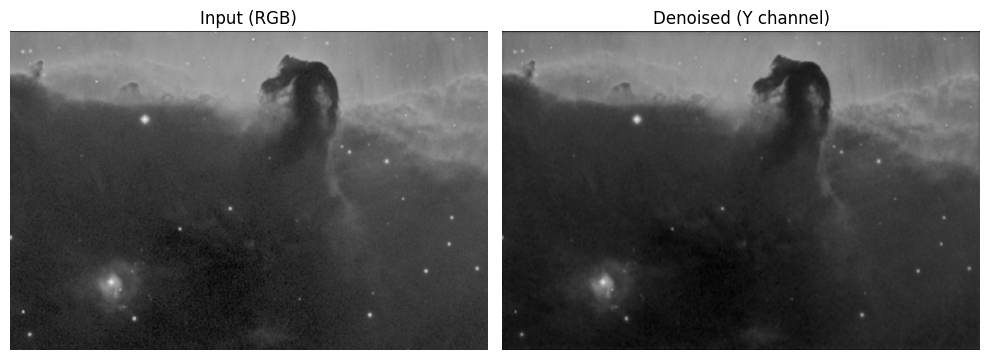

In [31]:
img1 = r"C:\Users\Ashmit\Pictures\Screenshots\Screenshot 2025-12-28 183256.png"
prediction( img1,  model ,  device )

C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


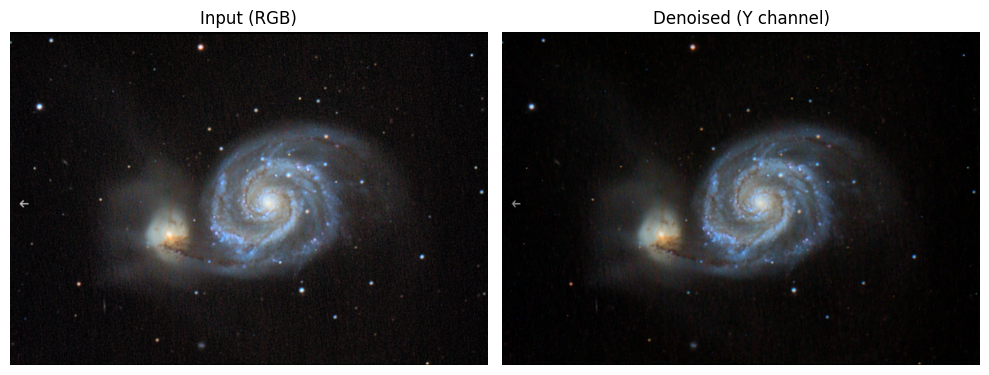

In [32]:
img2 =  r"C:\Users\Ashmit\Pictures\Screenshots\Screenshot 2025-12-28 183524.png"
prediction(img2 ,  model ,  device)

C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


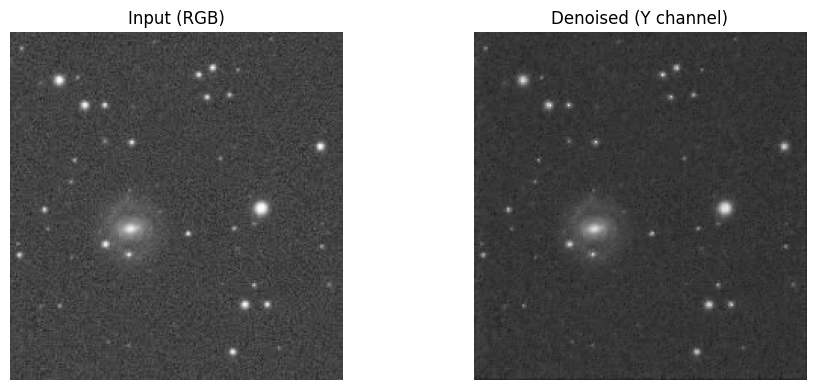

In [35]:
img6 = r"C:\Users\Ashmit\Downloads\images (7).jpg"
prediction(img6 ,  model ,  device)

In [36]:
img7 = r"C:\Users\Ashmit\Downloads\nxQsL.png"
img8 = r"C:\Users\Ashmit\Downloads\images (9).jpg"

C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


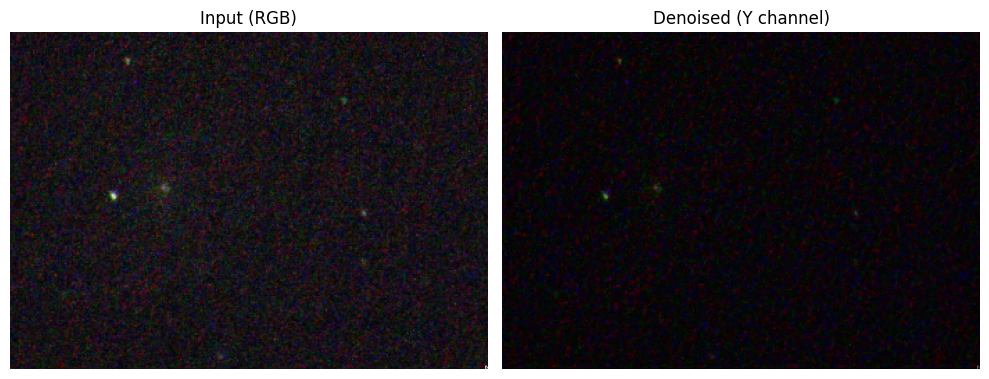

In [37]:
prediction(img7 ,  model ,  device)

In [40]:
img10 = r"C:\Users\Ashmit\Downloads\images (11).jpg"
img11 = r"C:\Users\Ashmit\Downloads\UEr7tQDntYC9ZzFG2trbY7-840-80.jpg"
img12 = r"C:\Users\Ashmit\Downloads\WN.jpg"
img13 = r"C:\Users\Ashmit\Downloads\post-349876-0-30321700-1670849865.jpg"
img14 = r"C:\Users\Ashmit\Downloads\post-409706-0-22613700-1694392898.png"
img15 = r"C:\Users\Ashmit\Downloads\Autosave001.jpg.1b4eb429be95ea36b6e43362bbf73a29.jpg"
img16 = r"C:\Users\Ashmit\Downloads\hubble-hptau-wfc3-1-flat-finalok.webp"


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


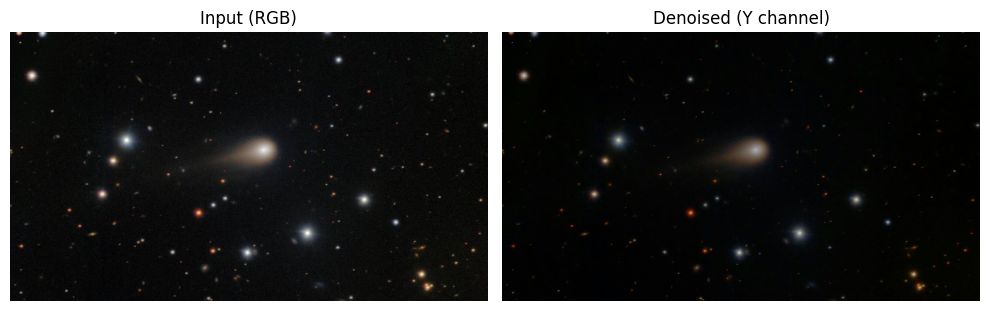

In [42]:
prediction(img11,  model ,  device)


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


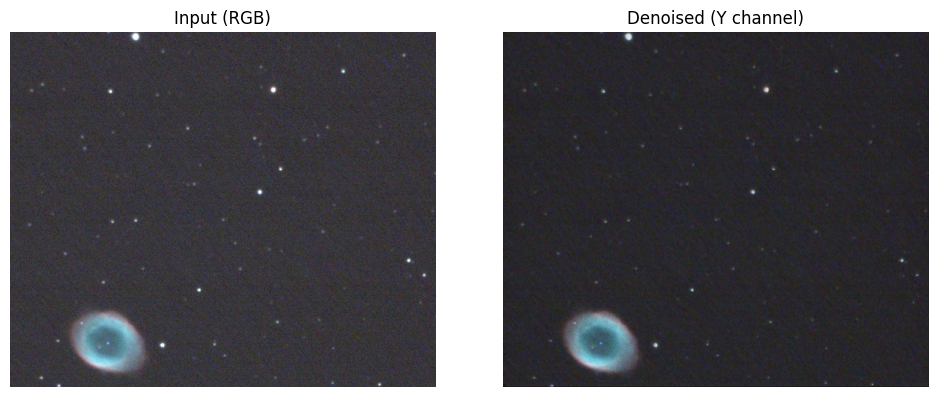

In [43]:
prediction(img12,  model ,  device)


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


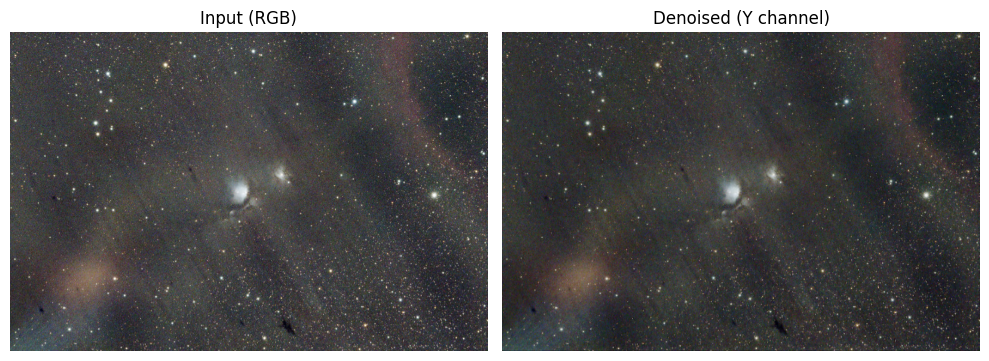

In [44]:
prediction(img13,  model ,  device)


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


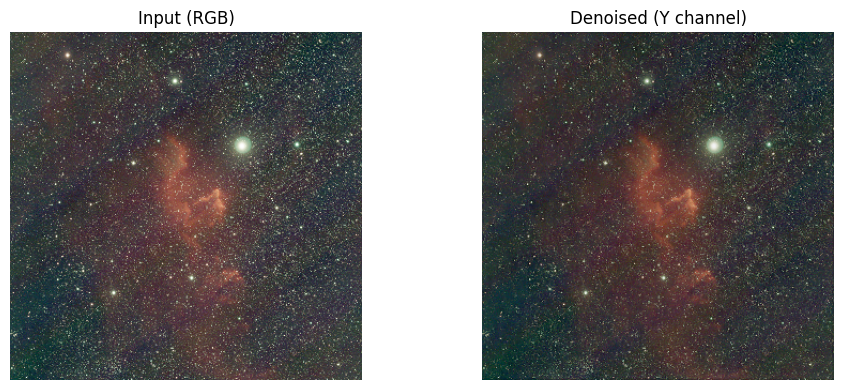

In [45]:
prediction(img14,  model ,  device)


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


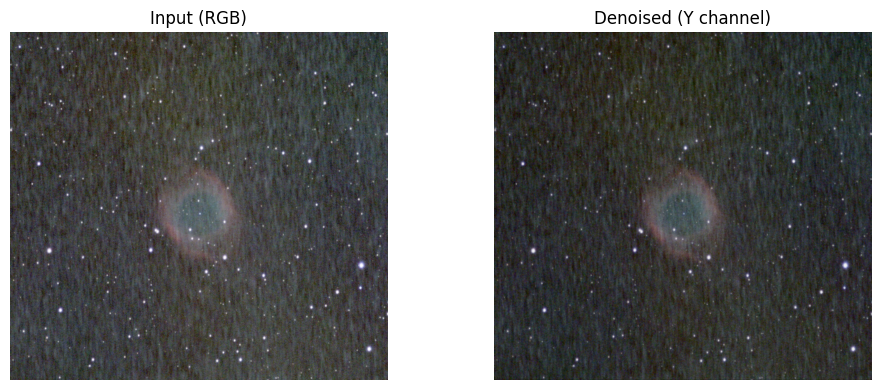

In [46]:
prediction(img15,  model ,  device)


C:\Users\Ashmit\AppData\Local\Temp\ipykernel_6932\3016320388.py:55: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  y_denoised_img = Image.fromarray(y_denoised, mode="L")


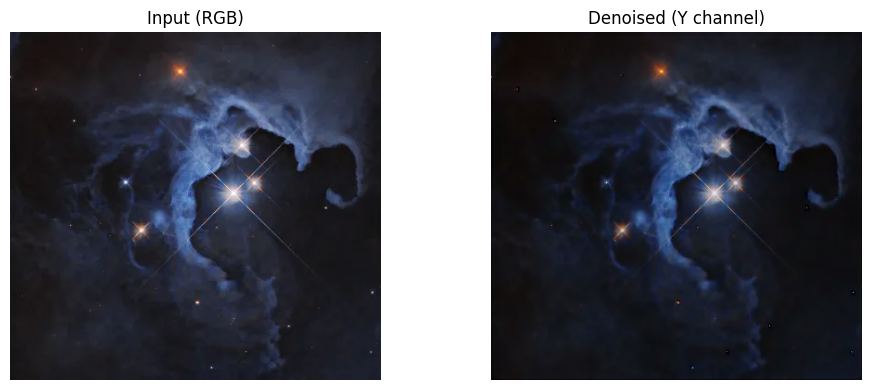

In [47]:
prediction(img16,  model ,  device)
